In [2]:
import pandas as pd
import json
import os

files = os.listdir("results_v2")

json_files = {}
for file in files:
    with open("results_v2/"+file, "r") as f:
        df = pd.DataFrame(json.load(f))
        json_files[file] = df

df = pd.concat(json_files.values(), axis = 0)
df

,tensor_location,criterion_score,layer_name,value_before,value_after
0,"[0, 0, 349]",0.0896,class_token,0.015516,3.003372
0,"[192, 0, 20, 30]",0.7614,conv_proj.weight,0.000377,0.684720
0,[376],0.7580,conv_proj.bias,0.016747,1.180125
0,"[0, 4, 201]",0.7608,encoder.pos_embedding,0.003855,-1.331274
0,"[0, 0, 28]",0.0670,class_token,-0.000617,12.727129
...,...,...,...,...,...
0,"[265, 580]",0.7608,encoder.layers.encoder_layer_0.mlp.3.weight,0.021907,0.050117
0,"[1845, 595]",0.7606,encoder.layers.encoder_layer_1.self_attention....,0.012764,-0.627010
0,[593],0.7608,encoder.layers.encoder_layer_0.ln_2.bias,-0.002866,-0.033859
0,[581],0.7612,encoder.layers.encoder_layer_0.mlp.3.bias,-0.070036,-0.463348


In [3]:
df.dtypes

tensor_location     object
criterion_score    float64
layer_name          object
value_before       float64
value_after        float64
dtype: object

In [10]:
from math import log10, floor
def round_to_1(x):
    return round(int(x*10), 1) / 10

df['tensor_location'] = df['tensor_location'].astype(str).astype('|S') # which will by default set the length to the max len it encounters
df['layer_name'] = df['layer_name'].astype('|S') # which will by default set the length to the max len it encounters
df['delta_val'] = (df['value_after'] - df["value_before"])
df['delta'] = df['delta_val'].apply(round_to_1).astype('|S')
df.dtypes

tensor_location       |S16
criterion_score    float64
layer_name            |S61
value_before       float64
value_after        float64
delta_val          float64
delta                 |S32
dtype: object

In [11]:
df = df.sort_values(by = ["layer_name", "delta", "tensor_location", "criterion_score"]).reset_index(drop = True)
df

,tensor_location,criterion_score,layer_name,value_before,value_after,delta_val,delta
0,"b'[0, 0, 635]'",0.1914,b'class_token',-0.001345,-0.422402,-0.421057,b'-0.4'
1,"b'[0, 0, 423]'",0.0870,b'class_token',-0.008282,0.906804,0.915086,b'0.9'
2,"b'[0, 0, 28]'",0.0670,b'class_token',-0.000617,12.727129,12.727746,b'12.7'
3,"b'[0, 0, 349]'",0.0896,b'class_token',0.015516,3.003372,2.987856,b'2.9'
4,b'[580]',0.7608,b'conv_proj.bias',-0.004763,-1.128484,-1.123721,b'-1.1'
...,...,...,...,...,...,...,...
61,"b'[0, 6, 210]'",0.7606,b'encoder.pos_embedding',0.053584,-0.316263,-0.369847,b'-0.3'
62,"b'[0, 48, 8]'",0.7608,b'encoder.pos_embedding',-0.063788,-0.904229,-0.840441,b'-0.8'
63,"b'[0, 44, 380]'",0.7606,b'encoder.pos_embedding',-0.118948,-1.332906,-1.213957,b'-1.2'
64,"b'[0, 4, 201]'",0.7608,b'encoder.pos_embedding',0.003855,-1.331274,-1.335129,b'-1.3'


<Axes: xlabel='delta', ylabel='criterion_score'>

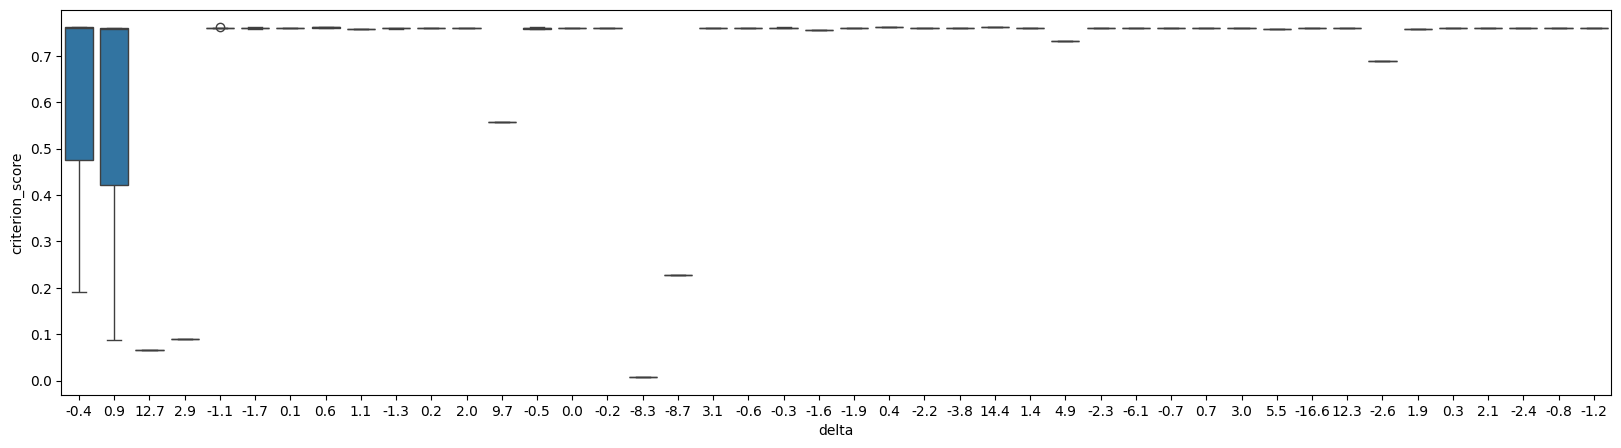

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20,5))
sns.boxplot(data = df, x = "delta", y = "criterion_score")

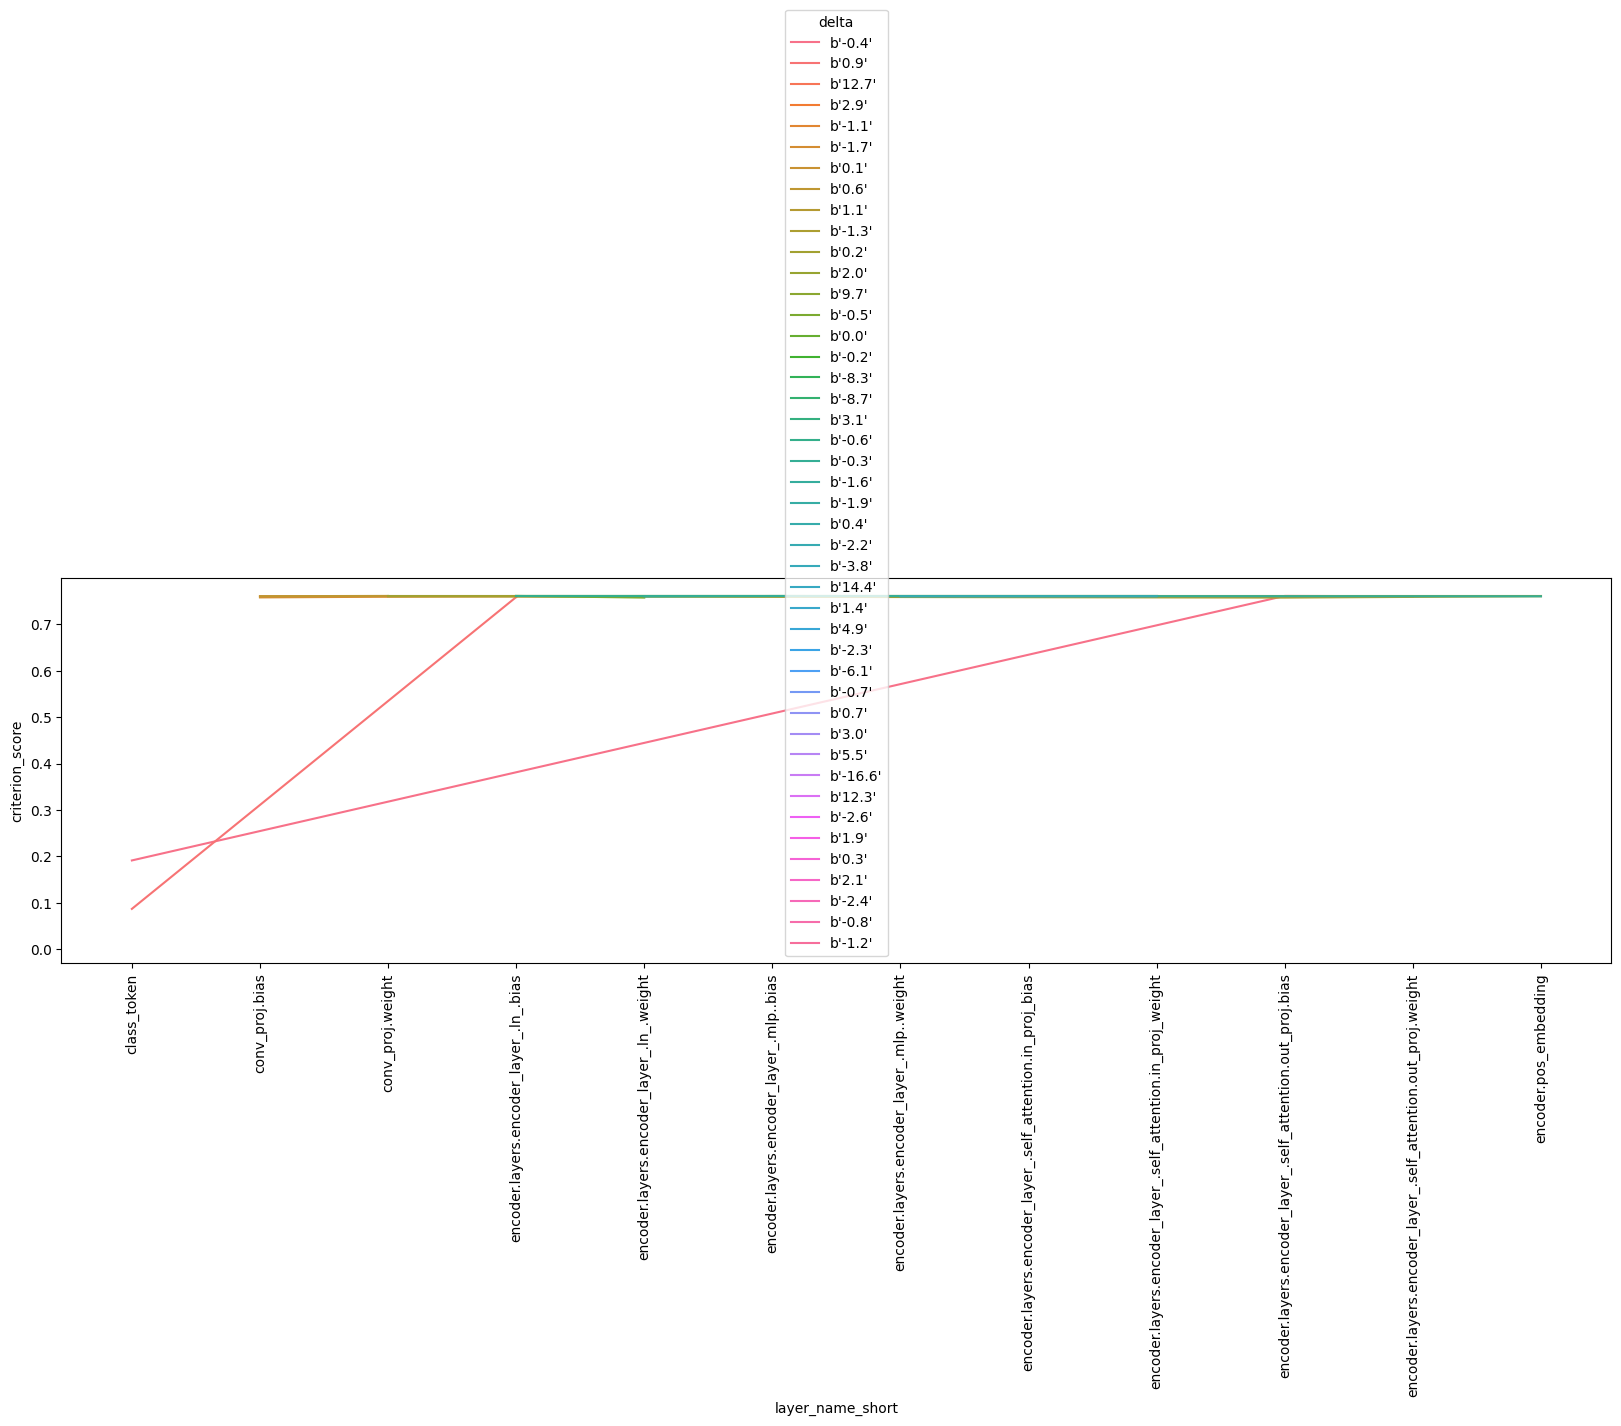

In [15]:
import matplotlib.pyplot as plt

df["layer_name_short"] = df["layer_name"].apply(lambda x: x.decode() if isinstance(x, bytes) else x).str.replace(r'\d+', '', regex=True)


plt.figure(figsize=(20,5))
sns.lineplot(data = df, x = "layer_name_short", y = "criterion_score", hue = "delta")
plt.xticks(rotation = 90)
plt.show()

In [16]:
df["delta"].value_counts()

C:\Users\wwden\AppData\Local\Temp\ipykernel_25428\857499797.py:1: FutureWarning: The behavior of value_counts with object-dtype is deprecated. In a future version, this will *not* perform dtype inference on the resulting index. To retain the old behavior, use `result.index = result.index.infer_objects()`
  df["delta"].value_counts()


delta
b'-1.1'     4
b'0.0'      4
b'-0.4'     3
b'0.2'      3
b'0.9'      3
b'-1.7'     3
b'-0.3'     3
b'-1.3'     3
b'-2.2'     2
b'-0.6'     2
b'-0.5'     2
b'0.6'      2
b'1.9'      1
b'-2.6'     1
b'4.9'      1
b'0.3'      1
b'12.3'     1
b'-16.6'    1
b'5.5'      1
b'3.0'      1
b'2.1'      1
b'0.7'      1
b'-2.4'     1
b'-0.7'     1
b'-0.8'     1
b'-6.1'     1
b'-2.3'     1
b'-1.9'     1
b'1.4'      1
b'14.4'     1
b'-3.8'     1
b'0.4'      1
b'-1.6'     1
b'3.1'      1
b'-8.7'     1
b'-8.3'     1
b'-0.2'     1
b'9.7'      1
b'2.0'      1
b'1.1'      1
b'0.1'      1
b'2.9'      1
b'12.7'     1
b'-1.2'     1
Name: count, dtype: int64

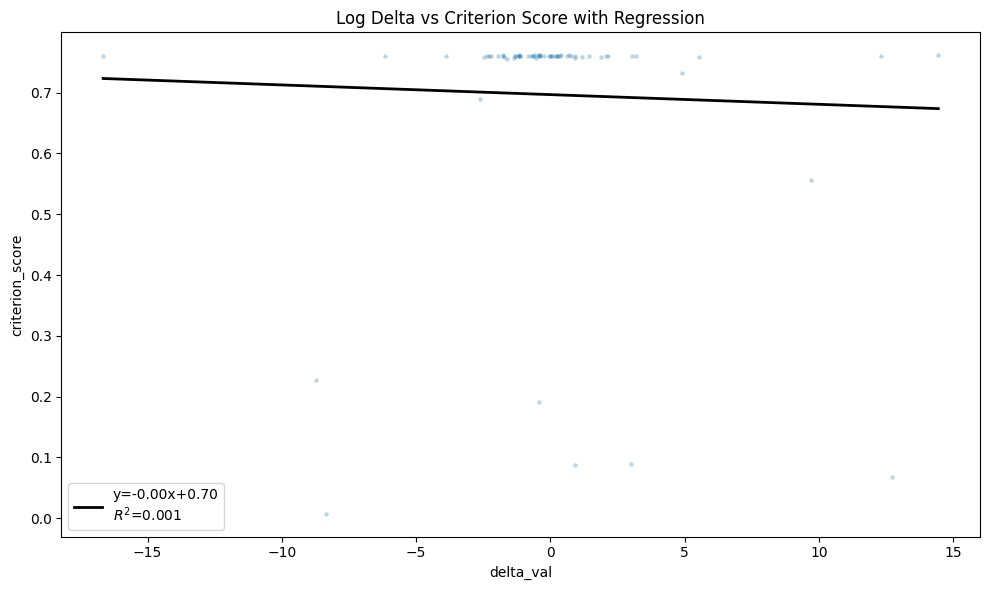

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Precompute regression
X = df["delta_val"].values.reshape(-1, 1)
y = df["criterion_score"].values
reg = LinearRegression().fit(X, y)
y_pred = reg.predict(X)
r2 = r2_score(y, y_pred)
slope = reg.coef_[0]
intercept = reg.intercept_

# Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="delta_val", y="criterion_score", alpha=0.3, s=10, linewidth=0)

# Overlay regression line
sns.lineplot(x=df["delta_val"], y=y_pred, color='black', linewidth=2, label=f"y={slope:.2f}x+{intercept:.2f}\n$R^2$={r2:.3f}")

plt.title("Log Delta vs Criterion Score with Regression")
plt.legend()
plt.tight_layout()
plt.show()


(array([ 1.,  0.,  0.,  0.,  0.,  2.,  1.,  0.,  1., 18., 23.,  9.,  5.,
         1.,  1.,  0.,  1.,  0.,  2.,  1.]),
 array([-16.65114887, -15.09646738, -13.54178589, -11.9871044 ,
        -10.43242291,  -8.87774142,  -7.32305993,  -5.76837844,
         -4.21369696,  -2.65901547,  -1.10433398,   0.45034751,
          2.005029  ,   3.55971049,   5.11439198,   6.66907346,
          8.22375495,   9.77843644,  11.33311793,  12.88779942,
         14.44248091]),
 <BarContainer object of 20 artists>)

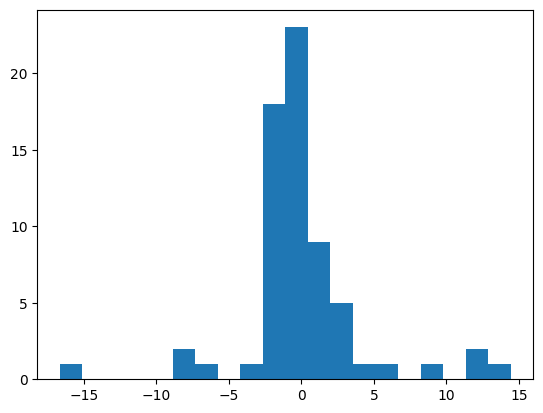

In [19]:
plt.hist(df["delta_val"], bins = 20)
